In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.13.0'

In [3]:
df = pd.read_csv('..\$ Datasets\Part 8 - Deep Learning\Section 39 - Artificial Neural Networks (ANN)\Python\Churn_Modelling.csv')
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

X,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 0], dtype=int64))

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Feature Scaling (MUST)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6721 - accuracy: 0.5855
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7981
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8104
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8152
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8199
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8315
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8366
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8439
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8462
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3639 - accura

In [9]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8665


[0.3334156274795532, 0.8665000200271606]

In [10]:
history.history

{'loss': [0.5473676323890686,
  0.4591156244277954,
  0.43647411465644836,
  0.42251506447792053,
  0.41362595558166504,
  0.4073370397090912,
  0.40241220593452454,
  0.3980799615383148,
  0.39415958523750305,
  0.39068275690078735,
  0.3872673511505127,
  0.38402411341667175,
  0.38082095980644226,
  0.3785466253757477,
  0.37617889046669006,
  0.37452831864356995,
  0.37243351340293884,
  0.37079107761383057,
  0.36912065744400024,
  0.36761409044265747,
  0.36678847670555115,
  0.36554065346717834,
  0.36471328139305115,
  0.3637431561946869,
  0.3627791106700897,
  0.36200016736984253,
  0.36072656512260437,
  0.3595535457134247,
  0.3586640954017639,
  0.35767868161201477,
  0.3569642901420593,
  0.35591477155685425,
  0.3564588725566864,
  0.3559721112251282,
  0.3547084927558899,
  0.35367533564567566,
  0.3529062867164612,
  0.3531351685523987,
  0.35175976157188416,
  0.35071465373039246,
  0.3502465486526489,
  0.3494076132774353,
  0.34882357716560364,
  0.34738102555274963

<Figure size 640x480 with 0 Axes>

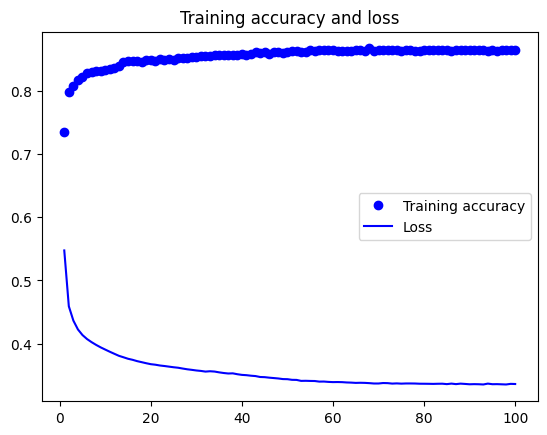

<Figure size 640x480 with 0 Axes>

In [11]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Training accuracy and loss')
plt.legend()
plt.figure()

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [12]:
model.predict(sc.fit_transform([[600, 1.0, 0.0, 0.0, 1, 40, 3, 60000, 2, 1, 1, 50000]]))

1/1 [==============================] - 0s 93ms/step


array([[0.15867609]], dtype=float32)

In [13]:
model.predict(sc.fit_transform([[600, 1.0, 0.0, 0.0, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5

1/1 [==============================] - 0s 31ms/step


array([[False]])

In [14]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1537   58]
 [ 209  196]]


0.8665